In [30]:
import sys
sys.path.insert(0,'/Users/willthompson/Documents/CSDS/DS1/FacilityScaling/src')#change this to your path
from facilityAnalysis import *
from linearRegression import * 
from facility_ABM import *
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
clinic_df = pd.read_csv("data/abortion_data.csv")

"""
LOAD AND CLEAN POPULATION INFORMATION
"""
#create population county data frame
COUNTY_SHP_FILE = 'data/UScounties/'
COUNTY_POP_FILE = '/Users/willthompson/Documents/CSDS/DS1/FacilityScaling//data/historical_county_populations.csv'
EPSG=4326

#create a dataframe with population information for each county
df_merged = make_county_pop_df(COUNTY_SHP_FILE,COUNTY_POP_FILE,EPSG)
#get the boundary of the US
boundary_shape = make_boundary(df_merged,EPSG)



In [3]:
df_pop = pd.read_csv("data/simulated_pop_points.csv")
gdf_pop = gpd.GeoDataFrame(df_pop,geometry = gpd.points_from_xy(df_pop.lon,df_pop.lat)).rename(columns = {"Unnamed: 0":"index"}).set_crs(4326)#.rename(columns ={" Unnamed: 0",'index'})#generate initial facility placement
df_state = df_merged.dissolve("state").reset_index().loc[:,['state','geometry']]

In [7]:
lat_col = 'latitude'#CHANGE TO THE NAME OF THE LAT COL IN YOUR DF
lon_col = "longitude"#CHANGE TO THE NAME OF THE LON COL IN YOUR DF
clinic_df = pd.read_csv('data/abortion_data.csv')
clinic_geo_df = create_facility_geo_df(clinic_df,boundary_shape,lat_col=lat_col,lon_col=lon_col).set_crs(4326)
clinic_geo_df = clinic_geo_df.reset_index()

creating facility points from lat lon pairs...
initializing GeoDataFrame...
filtering locations within boundaries


## Real World Objective Functions

In [11]:
#abortion_nearest_facility = calc_facility_distance(gdf_pop,clinic_geo_df)
pop_with_facility_info = calc_facility_distance(gdf_pop,clinic_geo_df)

#pop_with_facilty_info = gpd.sjoin(abortion_nearest_facility.set_geometry("nearest_fac"),clinic_geo_df.set_crs(4326)).set_geometry('geometry')

In [18]:
objective_function = objective_function(pop_with_facility_info,value_col='distance',groupby_col='nearest_fac')

TypeError: 'numpy.float64' object is not callable

In [19]:
objective_function/1070

1426293.3570354495

In [20]:
clinic_geo_df.shape

(1070, 27)

In [21]:
pop_row = gdf_pop.iloc[0]

nearest_fac = nearest(pop_row,df2=clinic_geo_df)


pop_row.geometry.distance(nearest_fac)

1.2735363980015333

<AxesSubplot:>

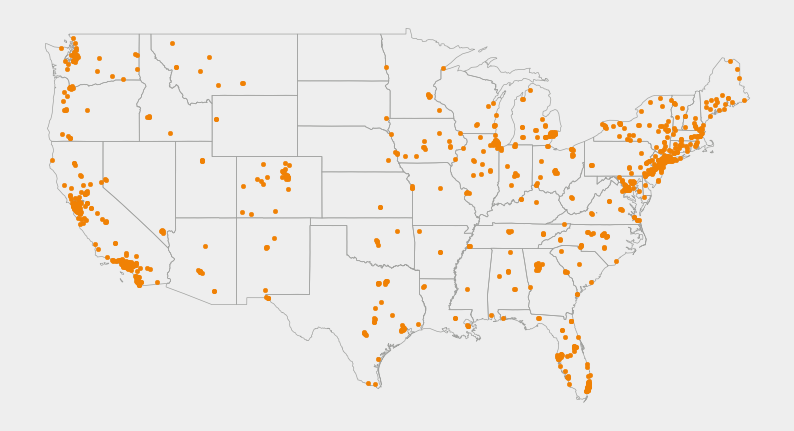

In [22]:
BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
clinic_geo_df.plot(ax = ax,color = DOT_COLOR,markersize = 11)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat')

<AxesSubplot:>

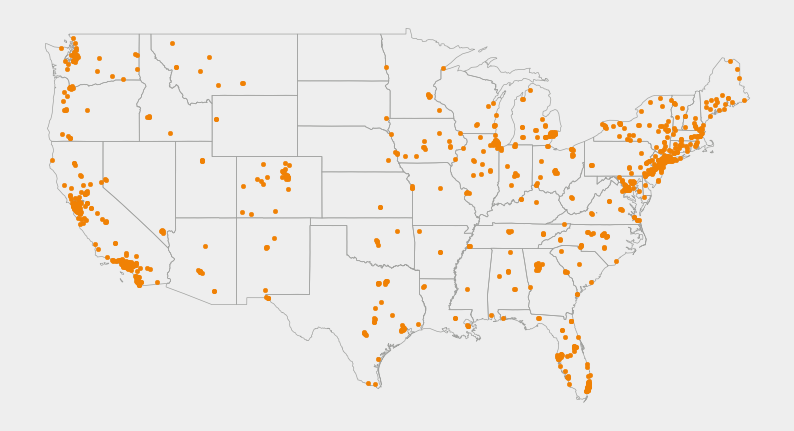

In [23]:
BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
clinic_geo_df.plot(ax = ax,color = DOT_COLOR,markersize = 11)


<AxesSubplot:>

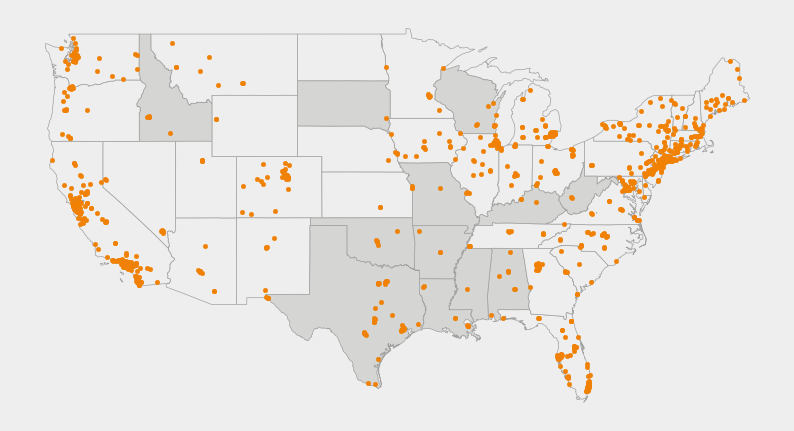

In [77]:

BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_state['is_legal'] = df_state['state'].isin(BANNED_STATES)

LEGAL_COLOR = "#EEEEEE"
ILEGAL_COLOR = "#D5D6D4"

LEGAL_DOT_COLOR = "#31D1DE"
ILEGAL_DOT_COLOR = "#F08104"


df_state['color'] = df_state.is_legal.apply(lambda x: ILEGAL_COLOR if x else LEGAL_COLOR)

clinic_geo_df['color'] = clinic_geo_df.state.isin(BANNED_STATES).apply(lambda x: ILEGAL_DOT_COLOR if x else LEGAL_DOT_COLOR)

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
clinic_geo_df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 11)


<AxesSubplot:>

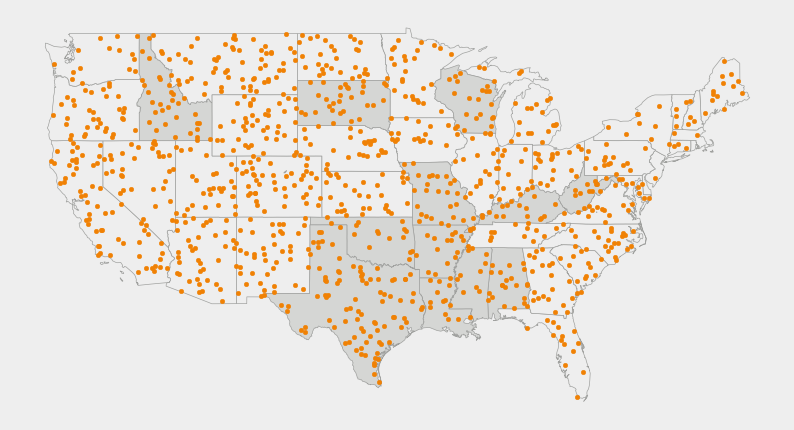

In [83]:
sim10df = gpd.read_parquet('all_10steps_placement.parq')

BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_state['is_legal'] = df_state['state'].isin(BANNED_STATES)

LEGAL_COLOR = "#EEEEEE"
ILEGAL_COLOR = "#D5D6D4"

LEGAL_DOT_COLOR = "#31D1DE"
ILEGAL_DOT_COLOR = "#F08104"


df_state['color'] = df_state.is_legal.apply(lambda x: ILEGAL_COLOR if x else LEGAL_COLOR)

clinic_geo_df['color'] = clinic_geo_df.state.isin(BANNED_STATES).apply(lambda x: ILEGAL_DOT_COLOR if x else LEGAL_DOT_COLOR)

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
sim10df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 11)

<AxesSubplot:>

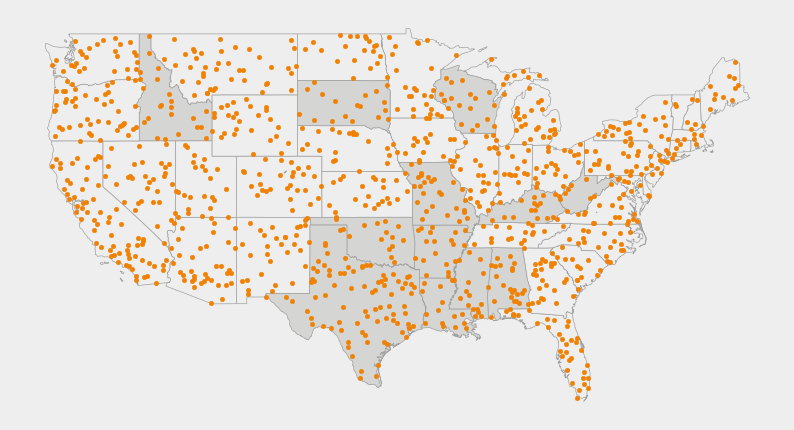

In [81]:
sim1000df = gpd.read_parquet('all_1000steps_placement.parq')

BANNED_STATES = ['Arkansas','Alabama','Idaho','Kentucky','Louisiana','Kentucky','Mississippi','Missouri','Oklahoma','South Dakota','Tenesee','Texas','West Virginia','Wisconsin']
df_state['is_legal'] = df_state['state'].isin(BANNED_STATES)

LEGAL_COLOR = "#EEEEEE"
ILEGAL_COLOR = "#D5D6D4"

LEGAL_DOT_COLOR = "#31D1DE"
ILEGAL_DOT_COLOR = "#F08104"


df_state['color'] = df_state.is_legal.apply(lambda x: ILEGAL_COLOR if x else LEGAL_COLOR)

clinic_geo_df['color'] = clinic_geo_df.state.isin(BANNED_STATES).apply(lambda x: ILEGAL_DOT_COLOR if x else LEGAL_DOT_COLOR)

BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
sim1000df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 11)

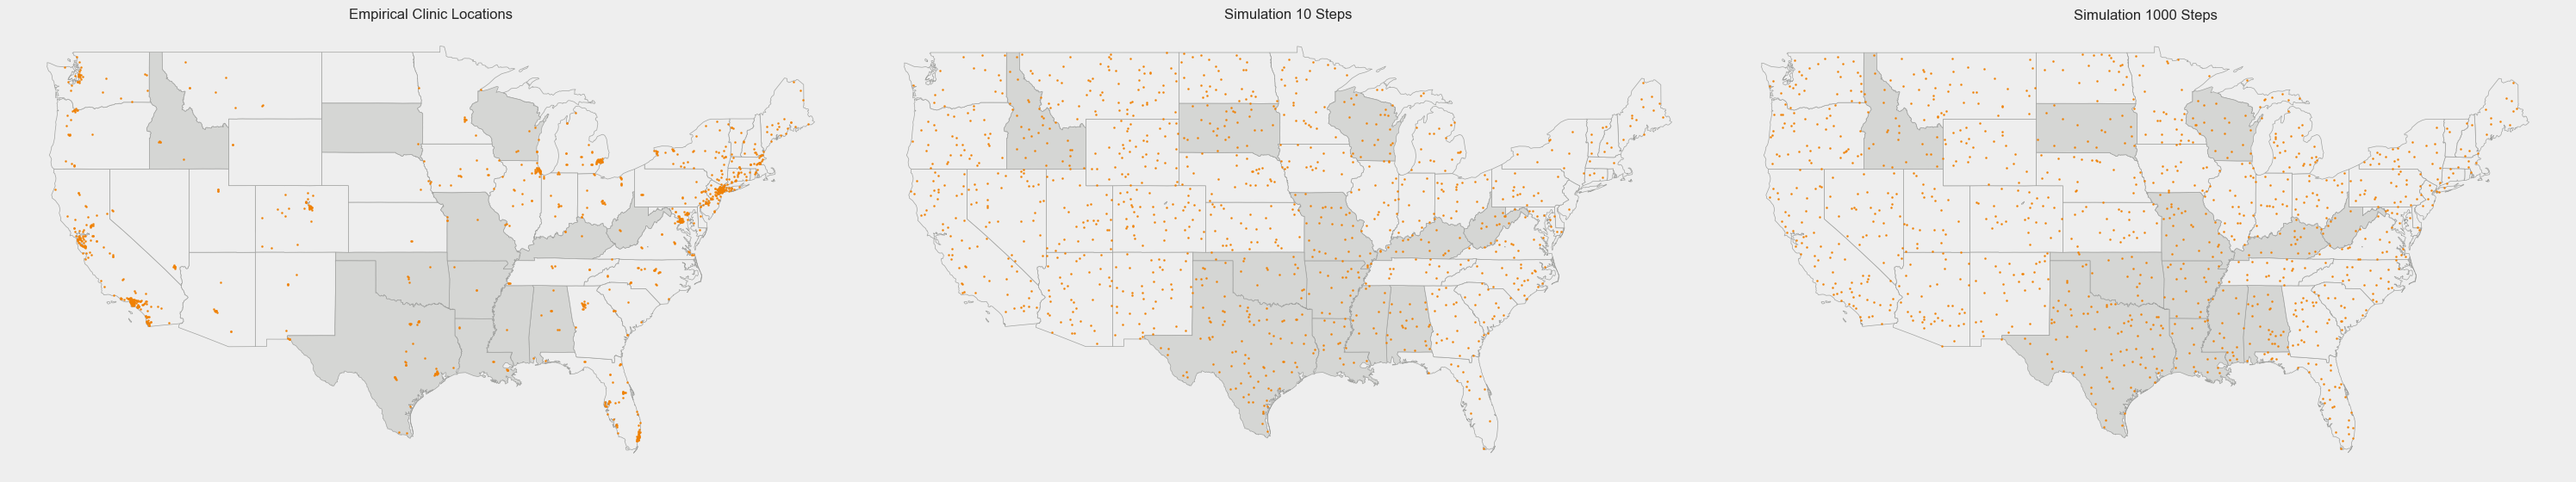

In [102]:
fig,axes = plt.subplots(ncols = 3,figsize = (30,10))

ax = axes[0]
ax.set(title = "Empirical Clinic Locations")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
clinic_geo_df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 2)

ax = axes[1]
ax.set(title = "Simulation 10 Steps")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
sim10df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 2)


ax = axes[2]
ax.set(title = "Simulation 1000 Steps")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
df_state.plot(ax = ax,facecolor = df_state['color'],edgecolor = LINE_COLOR,lw = 0.5)
sim1000df.plot(ax = ax,color = ILEGAL_DOT_COLOR,markersize = 2)
plt.tight_layout()
plt.savefig('plots/simulation_facility_loc.png',dpi=300)

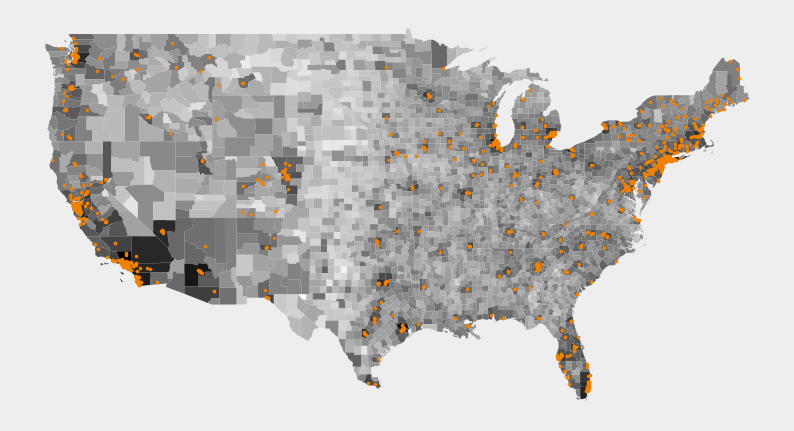

In [104]:
df_merged['log_pop'] = np.log10(df_merged['pop_2010'])


BACKGROUND_COLOR = '#EEEEEE'
LINE_COLOR ="#A0A19F"
DOT_COLOR = "#F08104"


fig,ax = plt.subplots(figsize = (10,15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

fig.patch.set_facecolor(BACKGROUND_COLOR)#set black background
ax.set_facecolor(BACKGROUND_COLOR)#set black foreground

    #df_merged.plot(column = df_pop_label,ax = ax,legend=True,cmap ='magma',norm=matplotlib.colors.LogNorm(vmin=1,vmax=pop_max),cax=cax)
    #geo_df_up_to_year.plot(ax = ax,markersize = 0.3,c='white',alpha = 0.4)
#sns.kdeplot(data = gdf_pop,x = 'lon',y = 'lat',bw_adjust=0.1,fill = True)
ax.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
#df_state.plot(ax = ax,facecolor = "none",edgecolor = LINE_COLOR,lw = 0.5)
df_merged.plot(column = 'log_pop',ax = ax)
clinic_geo_df.plot(ax = ax,color = DOT_COLOR,markersize = 5)
df_merged['log_pop'] =np.log(df_merged['pop_2010'])
plt.savefig("plots/abortion_facility_locs_with_pop.png")


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>